<a href="https://colab.research.google.com/github/TomisinFalode/Projects/blob/main/Month_1/Week_3/Assignments/pandas_fundamentals_II_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Analysis - Week 3
## Minor Assignment: Pandas Fundamentals II

**Due Date:** Wednesday, April 23, 2025

### Overview
In this assignment, you will practice the core Pandas concepts covered in today's lecture: indexing and selection, filtering data, and handling missing values. You'll work with a customer purchase dataset to clean, transform, and extract insights from the data.

### Learning Objectives
By completing this assignment, you will be able to:
- Use different methods for indexing and selecting data in Pandas
- Apply filtering operations to extract specific subsets of data
- Identify and handle missing values using various techniques
- Apply these techniques to solve real-world data cleaning challenges

### Dataset
You will be working with a customer purchase dataset (`customer_purchase_data.csv`) containing information about customers, their demographics, and their purchase transactions.

### Submission Guidelines
- Submit your completed notebook via the course portal
- Include your name and student ID in the notebook
- Ensure all code cells are executed and outputs are visible
- Add comments to explain your code and reasoning

Let's begin!

## Student Information

**Name:**  
**Student ID:**  

## Setup

First, let's import the necessary libraries and load the dataset.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

# For plotting in the notebook
%matplotlib inline

In [2]:
# Load the dataset
from google.colab import files
uploaded=files.upload()

Saving customer_purchase_data.csv to customer_purchase_data.csv


In [3]:
df=pd.read_csv(next(iter(uploaded)))

In [4]:
# Load the dataset
#df = pd.read_csv('../../Data/customer_purchase_data.csv')

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
0,1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-03-05,P001,Laptop HP Elite,Electronics,Computers,1200.50,1.0,Credit Card
1,1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-02-15,P045,External Hard Drive,Electronics,Accessories,89.99,2.0,Credit Card
2,1002,Female,28,65000,Teacher,Master,West,Single,2024-03-10,P012,Yoga Mat,Sports,Fitness,35.50,1.0,PayPal
3,1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-07,P023,Coffee Maker,Home,Kitchen,149.99,NaN,Debit Card
4,1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-15,P056,Professional Blender,Home,Kitchen,299.95,1.0,Credit Card


## Part 1: Exploring the Dataset (10 points)

Before we dive into the main tasks, let's first explore the dataset to understand its structure and content.

### 1.1 Dataset Information

Examine the basic information about the dataset by answering the following questions:

1. How many rows and columns does the dataset have?
2. What are the column names and their data types?
3. Are there any missing values in the dataset? If so, in which columns?

In [6]:
# Display information about the dataset
# df.info()
print('\nMissing values per column:\n', df.isnull().sum())


Missing values per column:
 CustomerID       0
Gender           0
Age              0
Income           0
Occupation       0
Education        0
Region           0
MaritalStatus    0
PurchaseDate     0
ProductID        0
ProductName      0
Category         0
Subcategory      0
Price            0
Quantity         2
PaymentMethod    0
dtype: int64


In [10]:
# Check the shape of the dataset
df.shape
print('Shape of the dataset:', df.shape)

Shape of the dataset: (57, 16)


In [11]:
# Display the last few rows
df.tail()

,CustomerID,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
52,1046,Male,32,70000,Civil Engineer,Master,Central,Single,2024-03-03,P478,Engineering Software,Software,Professional,1200.0,1.0,Bank Transfer
53,1047,Female,48,112000,Human Resources Director,Master,West,Married,2024-02-25,P489,HR Management Books,Books,Professional,120.0,2.0,Credit Card
54,1048,Male,27,59000,Web Developer,Bachelor,South,Single,2024-03-17,P490,Web Development Course,Services,Education,349.0,1.0,PayPal
55,1049,Female,38,84000,Nutritionist,Master,North,Married,2024-03-10,P501,Nutrition Books,Books,Health,95.0,2.0,Debit Card
56,1050,Male,42,95000,Sales Manager,Bachelor,East,Married,2024-02-28,P512,CRM Software,Software,Business,399.0,1.0,Credit Card


In [13]:
# Display the columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Occupation', 'Education', 'Region', 'MaritalStatus', 'PurchaseDate', 'ProductID', 'ProductName', 'Category', 'Subcategory', 'Price', 'Quantity', 'PaymentMethod'], dtype='object')

In [16]:
# Display the index
df.index

RangeIndex(start=0, stop=57, step=1)

In [17]:
# Summary statistics of numerical columns
df.describe()

,CustomerID,Age,Income,Price,Quantity
count,57.000000,57.000000,57.000000,57.000000,55.000000
mean,1023.596491,36.526316,81824.561404,343.641053,1.236364
std,14.959302,8.600468,23062.897544,340.347024,0.507851
min,1001.000000,21.000000,35000.000000,35.500000,1.000000
25%,1011.000000,30.000000,65000.000000,125.000000,1.000000
50%,1023.000000,36.000000,80000.000000,220.000000,1.000000
75%,1036.000000,44.000000,95000.000000,399.000000,1.000000
max,1050.000000,53.000000,135000.000000,1599.990000,3.000000


In [18]:
# Check for missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Occupation,0
Education,0
Region,0
MaritalStatus,0
PurchaseDate,0
ProductID,0


## Part 2: Indexing and Selection (30 points)

In this section, you will practice various methods for selecting and indexing data in Pandas.

### 2.1 Basic Indexing

Use different indexing methods to extract the following from the dataset:

1. Select the 'CustomerID', 'Age', 'Income', and 'Region' columns using bracket notation
2. Select the same columns using dot notation
3. Select rows 10 through 20 (inclusive) using iloc
4. Select the first 5 customers who made purchases in the 'Electronics' category using loc

In [19]:
#1. Select columns using bracket notation
df[['CustomerID', 'Gender', 'Category']].head()

,CustomerID,Gender,Category
0,1001,Male,Electronics
1,1001,Male,Electronics
2,1002,Female,Sports
3,1003,Female,Home
4,1003,Female,Home


In [20]:
# 2. Select columns using dot notation
df.Region.head()

,Region
0,East
1,East
2,West
3,Central
4,Central


In [21]:
# 3. Select rows 10 through 20 using iloc
df.iloc[10:21]

,CustomerID,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
10,1007,Female,31,67000,Analyst,Bachelor,North,Single,2024-03-09,P067,Running Shoes,Sports,Footwear,120.50,1.0,Debit Card
11,1008,Male,26,55000,Designer,Bachelor,East,Single,2024-03-11,P078,Smart Watch,Electronics,Wearables,249.99,1.0,Credit Card
12,1009,Female,48,110000,Director,Master,South,Married,2024-03-06,P089,Dining Table,Furniture,Dining,899.99,1.0,Bank Transfer
13,1010,Male,33,78000,Developer,Master,West,Married,2024-03-08,P090,Office Chair,Furniture,Office,349.50,2.0,Credit Card
14,1011,Female,29,59000,Nurse,Bachelor,Central,Single,2024-02-25,P101,First Aid Kit,Health,Emergency,45.99,1.0,Debit Card
15,1012,Male,41,92000,Consultant,PhD,East,Married,2024-03-13,P112,Business Laptop,Electronics,Computers,1599.99,1.0,Credit Card
16,1012,Male,41,92000,Consultant,PhD,East,Married,2024-01-15,P089,Dining Table,Furniture,Dining,899.99,1.0,Bank Transfer
17,1013,Female,36,81000,Pharmacist,Master,North,Divorced,2024-03-04,P123,Prescription Glasses,Health,Vision,199.50,1.0,Health Insurance
18,1014,Male,23,48000,Accountant,Bachelor,West,Single,2024-03-01,P134,Tax Software,Software,Finance,79.99,1.0,PayPal
19,1015,Female,37,76000,Marketing,Master,South,Married,2024-02-22,P145,Digital Camera,Electronics,Photography,699.95,1.0,Credit Card


In [22]:
# 4. Select the first 5 customers who made purchases in the 'Electronics' category
df[df['Category'] == 'Electronics'].head(5)

,CustomerID,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
0,1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-03-05,P001,Laptop HP Elite,Electronics,Computers,1200.50,1.0,Credit Card
1,1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-02-15,P045,External Hard Drive,Electronics,Accessories,89.99,2.0,Credit Card
5,1003,Female,45,95000,Doctor,PhD,Central,Married,2024-01-22,P078,Smart Watch,Electronics,Wearables,249.99,1.0,Debit Card
7,1005,Female,21,35000,Student,High School,West,Single,2024-02-28,P045,External Hard Drive,Electronics,Accessories,89.99,1.0,PayPal
8,1005,Female,21,35000,Student,High School,West,Single,2024-03-14,P098,Wireless Earbuds,Electronics,Audio,129.95,1.0,PayPal


### 2.2 Advanced Indexing

Now, let's explore more advanced indexing techniques:

1. Set the 'CustomerID' column as the index of the DataFrame
2. Select all purchase information for customer with ID 1003 using the index
3. Multi-level indexing: Create a MultiIndex using 'Region' and 'Category' as index levels
4. Select all purchases in the 'East' region for the 'Electronics' category using the MultiIndex

In [25]:
# 1. Set 'CustomerID' as the index
df_indexed = df.set_index('CustomerID')
df_indexed.head()

,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
CustomerID,,,,,,,,,,,,,,,
1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-03-05,P001,Laptop HP Elite,Electronics,Computers,1200.50,1.0,Credit Card
1001,Male,34,72000,Engineer,Bachelor,East,Married,2024-02-15,P045,External Hard Drive,Electronics,Accessories,89.99,2.0,Credit Card
1002,Female,28,65000,Teacher,Master,West,Single,2024-03-10,P012,Yoga Mat,Sports,Fitness,35.50,1.0,PayPal
1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-07,P023,Coffee Maker,Home,Kitchen,149.99,NaN,Debit Card
1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-15,P056,Professional Blender,Home,Kitchen,299.95,1.0,Credit Card


In [26]:
# 2. Select all purchase information for customer 1003
df_indexed.loc[1003]

,Gender,Age,Income,Occupation,Education,Region,MaritalStatus,PurchaseDate,ProductID,ProductName,Category,Subcategory,Price,Quantity,PaymentMethod
CustomerID,,,,,,,,,,,,,,,
1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-07,P023,Coffee Maker,Home,Kitchen,149.99,NaN,Debit Card
1003,Female,45,95000,Doctor,PhD,Central,Married,2024-03-15,P056,Professional Blender,Home,Kitchen,299.95,1.0,Credit Card
1003,Female,45,95000,Doctor,PhD,Central,Married,2024-01-22,P078,Smart Watch,Electronics,Wearables,249.99,1.0,Debit Card


In [27]:
# 3. Create a MultiIndex using 'Region' and 'Category'
df_multi = df.set_index(['Region', 'Category'])
df_multi.head()

CustomerID  Gender  Age  Income Occupation Education MaritalStatus PurchaseDate ProductID           ProductName  Subcategory    Price  Quantity PaymentMethod
Region  Category                                                                                                                                                                  
East    Electronics        1001    Male   34   72000   Engineer  Bachelor       Married   2024-03-05      P001       Laptop HP Elite    Computers  1200.50       1.0   Credit Card
        Electronics        1001    Male   34   72000   Engineer  Bachelor       Married   2024-02-15      P045   External Hard Drive  Accessories    89.99       2.0   Credit Card
West    Sports             1002  Female   28   65000    Teacher    Master        Single   2024-03-10      P012              Yoga Mat      Fitness    35.50       1.0        PayPal
Central Home               1003  Female   45   95000     Doctor       PhD       Married   2024-03-07      P023          Coffee Maker      Kitchen   149.99       NaN    Debit Card
        Home               1003  Female   45   95000     Doctor       PhD       Married   2024-03-15      P056  Professional Blender      Kitchen   299.95       1.0   Credit Card

In [28]:
# 4. Select all purchases in the 'East' region for the 'Electronics' category
df_multi.loc[('East', 'Electronics')]

<ipython-input-28-a31f9a248d07>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_multi.loc[('East', 'Electronics')]


CustomerID  Gender  Age  Income        Occupation  Education MaritalStatus PurchaseDate ProductID          ProductName  Subcategory    Price  Quantity PaymentMethod
Region Category                                                                                                                                                                         
East   Electronics        1001    Male   34   72000          Engineer   Bachelor       Married   2024-03-05      P001      Laptop HP Elite    Computers  1200.50       1.0   Credit Card
       Electronics        1001    Male   34   72000          Engineer   Bachelor       Married   2024-02-15      P045  External Hard Drive  Accessories    89.99       2.0   Credit Card
       Electronics        1008    Male   26   55000          Designer   Bachelor        Single   2024-03-11      P078          Smart Watch    Wearables   249.99       1.0   Credit Card
       Electronics        1012    Male   41   92000        Consultant        PhD       Married   2024-03-13      P112      Business Laptop    Computers  1599.99       1.0   Credit Card
       Electronics        1019  Female   32   69000        HR Manager     Master       Married   2024-02-17      P190   Ergonomic Keyboard  Accessories   129.99       1.0   Credit Card
       Electronics        1025  Female   25   52000  Graphic Designer   Bachelor        Single   2024-03-19      P256       Drawing Tablet       Design   299.00       1.0        PayPal
       Electronics        1040    Male   24   51000  Customer Service  Associate        Single   2024-03-01      P412              Headset        Audio   129.00       1.0    Debit Card

### 2.3 Practical Application: Creating Customer Profiles

Now, use your indexing skills to create a customer profile DataFrame that contains the following information for each unique customer:
- CustomerID
- Gender
- Age
- Income
- Education
- Region
- MaritalStatus

Hint: You'll need to remove duplicate customer entries since the same customer may have made multiple purchases.

In [38]:
# Create customer profile DataFrame
# Create the customer profile DataFrame by selecting relevant columns and dropping duplicates
customer_profile = df[['CustomerID', 'Gender', 'Age', 'Income', 'Education', 'Region', 'MaritalStatus']].drop_duplicates()
customer_profile.head()


,CustomerID,Gender,Age,Income,Education,Region,MaritalStatus
0,1001,Male,34,72000,Bachelor,East,Married
2,1002,Female,28,65000,Master,West,Single
3,1003,Female,45,95000,PhD,Central,Married
6,1004,Male,52,120000,Master,East,Divorced
7,1005,Female,21,35000,High School,West,Single


In [39]:
# Set CustomerID as the index
customer_profile = customer_profile.set_index('CustomerID')

In [40]:
# Display the first few rows
print(customer_profile.head())

            Gender  Age  Income    Education   Region MaritalStatus
CustomerID                                                         
1001          Male   34   72000     Bachelor     East       Married
1002        Female   28   65000       Master     West        Single
1003        Female   45   95000          PhD  Central       Married
1004          Male   52  120000       Master     East      Divorced
1005        Female   21   35000  High School     West        Single


## Part 3: Filtering Data (30 points)

In this section, you will practice applying filters to extract specific subsets of data.

### 3.1 Basic Filtering

Apply filters to find the following information:

1. Customers who are younger than 30 years old
2. Purchases made in the 'Electronics' category with a price greater than $500
3. Female customers who have made purchases in the 'Books' category
4. Customers from the 'West' region who are married

In [41]:
# Reset index if needed
if df.index.name == 'CustomerID':
    df = df.reset_index()

# 1. Customers younger than 30
customers_under_30 = df[df['Age'] < 30]

# Display the result
print(customers_under_30.head())

    CustomerID  Gender  Age  Income Occupation    Education   Region MaritalStatus PurchaseDate ProductID          ProductName     Category  Subcategory   Price  Quantity PaymentMethod
2         1002  Female   28   65000    Teacher       Master     West        Single   2024-03-10      P012             Yoga Mat       Sports      Fitness   35.50       1.0        PayPal
7         1005  Female   21   35000    Student  High School     West        Single   2024-02-28      P045  External Hard Drive  Electronics  Accessories   89.99       1.0        PayPal
8         1005  Female   21   35000    Student  High School     West        Single   2024-03-14      P098     Wireless Earbuds  Electronics        Audio  129.95       1.0        PayPal
11        1008    Male   26   55000   Designer     Bachelor     East        Single   2024-03-11      P078          Smart Watch  Electronics    Wearables  249.99       1.0   Credit Card
14        1011  Female   29   59000      Nurse     Bachelor  Central       

In [42]:
# 2. Electronics purchases with price > $500
# Filter for Electronics purchases with price greater than $500
high_value_electronics = df[(df['Category'] == 'Electronics') & (df['Price'] > 500)]

# Display the result
print(high_value_electronics.head())


    CustomerID  Gender  Age  Income               Occupation  Education   Region MaritalStatus PurchaseDate ProductID      ProductName     Category  Subcategory    Price  Quantity PaymentMethod
0         1001    Male   34   72000                 Engineer   Bachelor     East       Married   2024-03-05      P001  Laptop HP Elite  Electronics    Computers  1200.50       1.0   Credit Card
15        1012    Male   41   92000               Consultant        PhD     East       Married   2024-03-13      P112  Business Laptop  Electronics    Computers  1599.99       1.0   Credit Card
19        1015  Female   37   76000                Marketing     Master    South       Married   2024-02-22      P145   Digital Camera  Electronics  Photography   699.95       1.0   Credit Card
38        1032    Male   22   42000  Social Media Specialist  Associate  Central        Single   2024-02-20      P334       Smartphone  Electronics       Mobile   899.00       1.0   Credit Card


In [43]:
# 3. Female customers who purchased books
# Filter for female customers who purchased items in the 'Books' category
female_book_buyers = df[(df['Gender'] == 'Female') & (df['Category'] == 'Books')]

# Display the result
print(female_book_buyers.head())


    CustomerID  Gender  Age  Income                Occupation Education Region MaritalStatus PurchaseDate ProductID               ProductName Category   Subcategory  Price  Quantity  PaymentMethod
34        1029  Female   46  105000              Psychologist       PhD  North      Divorced   2024-02-21      P290          Psychology Books    Books  Professional  175.0       2.0    Credit Card
37        1031  Female   39   88000                  Attorney        JD   West       Married   2024-03-08      P323     Legal Reference Books    Books  Professional  220.0       1.0  Bank Transfer
47        1041  Female   44  102000        Marketing Director       MBA   West       Married   2024-02-23      P423  Marketing Strategy Books    Books      Business  110.0       2.0  Bank Transfer
53        1047  Female   48  112000  Human Resources Director    Master   West       Married   2024-02-25      P489       HR Management Books    Books  Professional  120.0       2.0    Credit Card
55        1049 

In [44]:
# 4. Married customers from West region
# Filter for married customers from the West region
married_west_customers = df[(df['MaritalStatus'] == 'Married') & (df['Region'] == 'West')]

# Display the first few results
print(married_west_customers.head())


    CustomerID  Gender  Age  Income          Occupation  Education Region MaritalStatus PurchaseDate ProductID               ProductName   Category   Subcategory   Price  Quantity     PaymentMethod
13        1010    Male   33   78000           Developer     Master   West       Married   2024-03-08      P090              Office Chair  Furniture        Office  349.50       2.0       Credit Card
31        1026    Male   43   99000             Dentist  Doctorate   West       Married   2024-02-29      P267             Water Flosser     Health        Dental   89.95       1.0  Health Insurance
37        1031  Female   39   88000            Attorney         JD   West       Married   2024-03-08      P323     Legal Reference Books      Books  Professional  220.00       1.0     Bank Transfer
42        1036    Male   47  108000               Pilot   Bachelor   West       Married   2024-03-13      P378            Travel Luggage     Travel          Bags  199.50       2.0       Credit Card
47        

### 3.2 Advanced Filtering

Now let's apply more complex filtering conditions:

1. Find high-value customers (Income > $90,000) who have made purchases in the 'Furniture' or 'Electronics' categories
2. Find customers who made purchases in January 2024 (hint: extract month and year from the PurchaseDate)
3. Find customers who have made multiple purchases (more than one transaction)
4. Find the top 5 most expensive products purchased using 'Credit Card' as the payment method

In [45]:
# 1. High-value customers who purchased Furniture or Electronics
# Define high-value as purchases over $500 in Furniture or Electronics
high_value_furn_elec = df[
    (df['Category'].isin(['Furniture', 'Electronics'])) &
    (df['Price'] > 500)
]

# Display the result
print(high_value_furn_elec.head())

    CustomerID  Gender  Age  Income  Occupation Education Region MaritalStatus PurchaseDate ProductID      ProductName     Category  Subcategory    Price  Quantity  PaymentMethod
0         1001    Male   34   72000    Engineer  Bachelor   East       Married   2024-03-05      P001  Laptop HP Elite  Electronics    Computers  1200.50       1.0    Credit Card
12        1009  Female   48  110000    Director    Master  South       Married   2024-03-06      P089     Dining Table    Furniture       Dining   899.99       1.0  Bank Transfer
15        1012    Male   41   92000  Consultant       PhD   East       Married   2024-03-13      P112  Business Laptop  Electronics    Computers  1599.99       1.0    Credit Card
16        1012    Male   41   92000  Consultant       PhD   East       Married   2024-01-15      P089     Dining Table    Furniture       Dining   899.99       1.0  Bank Transfer
19        1015  Female   37   76000   Marketing    Master  South       Married   2024-02-22      P145   D

In [46]:
# Convert PurchaseDate to datetime if not already
if not pd.api.types.is_datetime64_dtype(df['PurchaseDate']):
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# 2. Customers who made purchases in January 2024
# Convert PurchaseDate to datetime if not already
if not pd.api.types.is_datetime64_dtype(df['PurchaseDate']):
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Filter customers who made purchases in January 2024
jan_2024_purchases = df[
    (df['PurchaseDate'].dt.year == 2024) & (df['PurchaseDate'].dt.month == 1)
]

# Display the result
print(jan_2024_purchases.head())


    CustomerID  Gender  Age  Income       Occupation Education   Region MaritalStatus PurchaseDate ProductID     ProductName     Category  Subcategory   Price  Quantity  PaymentMethod
5         1003  Female   45   95000           Doctor       PhD  Central       Married   2024-01-22      P078     Smart Watch  Electronics    Wearables  249.99       1.0     Debit Card
16        1012    Male   41   92000       Consultant       PhD     East       Married   2024-01-15      P089    Dining Table    Furniture       Dining  899.99       1.0  Bank Transfer
36        1030    Male   29   64000  Fitness Trainer  Bachelor     East        Single   2024-01-25      P312  Protein Powder       Health  Supplements   65.00       2.0     Debit Card


In [47]:
# 3. Customers with multiple purchases
# Group by CustomerID and count the number of purchases
purchase_counts = df['CustomerID'].value_counts()

# Filter for customers with more than one purchase
multiple_purchasers_ids = purchase_counts[purchase_counts > 1].index

# Get all rows corresponding to those customers
multiple_purchasers = df[df['CustomerID'].isin(multiple_purchasers_ids)]

# Display the first few results
print(multiple_purchasers.head())


   CustomerID  Gender  Age  Income Occupation Education   Region MaritalStatus PurchaseDate ProductID           ProductName     Category  Subcategory    Price  Quantity PaymentMethod
0        1001    Male   34   72000   Engineer  Bachelor     East       Married   2024-03-05      P001       Laptop HP Elite  Electronics    Computers  1200.50       1.0   Credit Card
1        1001    Male   34   72000   Engineer  Bachelor     East       Married   2024-02-15      P045   External Hard Drive  Electronics  Accessories    89.99       2.0   Credit Card
3        1003  Female   45   95000     Doctor       PhD  Central       Married   2024-03-07      P023          Coffee Maker         Home      Kitchen   149.99       NaN    Debit Card
4        1003  Female   45   95000     Doctor       PhD  Central       Married   2024-03-15      P056  Professional Blender         Home      Kitchen   299.95       1.0   Credit Card
5        1003  Female   45   95000     Doctor       PhD  Central       Married   2024

In [48]:
# 4. Top 5 most expensive products purchased with Credit Card
# Filter purchases made with Credit Card
credit_card_purchases = df[df['PaymentMethod'] == 'Credit Card']

# Sort by Price in descending order and get the top 5
top_5_expensive_credit = credit_card_purchases.sort_values(by='Price', ascending=False).head(5)

# Display the result
print(top_5_expensive_credit[['ProductName', 'Category', 'Price', 'CustomerID']])


        ProductName      Category    Price  CustomerID
15  Business Laptop   Electronics  1599.99        1012
0   Laptop HP Elite   Electronics  1200.50        1001
51    Lab Equipment  Professional   975.00        1045
38       Smartphone   Electronics   899.00        1032
19   Digital Camera   Electronics   699.95        1015


### 3.3 Practical Application: Customer Segmentation

Use filtering to segment customers based on the following criteria:

1. Create a 'CustomerValue' column that categorizes customers as follows:
   - 'High': Income > $90,000
   - 'Medium': Income between $60,000 and $90,000
   - 'Low': Income < $60,000
   
2. Create a 'AgeGroup' column that categorizes customers as follows:
   - 'Young': Age < 30
   - 'Middle-aged': Age between 30 and 45
   - 'Senior': Age > 45
   
3. Create a 'PurchaseFrequency' column that categorizes customers as follows:
   - 'Frequent': More than 2 purchases
   - 'Occasional': 1-2 purchases

4. Create a cross-tabulation of CustomerValue and AgeGroup to see the distribution of customers

In [63]:
# Create customer profile DataFrame if not already created
if 'customer_profiles' not in locals():
    customer_profiles = df[['CustomerID', 'Gender', 'Age', 'Income', 'Education', 'Region', 'MaritalStatus']].drop_duplicates(subset=['CustomerID'])

# 1. Create CustomerValue column
customer_profiles['CustomerValue'] = pd.cut(
    customer_profiles['Income'],
    bins=[-float('inf'), 60000, 90000, float('inf')],
    labels=['Low', 'Medium', 'High']
)
customer_profiles['CustomerValue']
customer_profiles['CustomerValue'].value_counts()


,count
CustomerValue,
Medium,23
High,18
Low,9


In [56]:


# 3. Create 'PurchaseFrequency' column from df (purchase data)


# Map counts to customer_profiles


# Fill NaN with 0 for customers with no purchase record (if any)
customer_profiles['PurchaseCount'] = customer_profiles['PurchaseCount'].fillna(0)

# Create 'PurchaseFrequency' category
def categorize_frequency(count):
    if count > 2:
        return 'Frequent'
    elif count > 0:
        return 'Occasional'
    else:
        return 'None'

customer_profiles['PurchaseFrequency'] = customer_profiles['PurchaseCount'].apply(categorize_frequency)

# 4. Create cross-tabulation of CustomerValue and AgeGroup
customer_distribution = pd.crosstab(customer_profiles['CustomerValue'], customer_profiles['AgeGroup'])

# Display the crosstab
print(customer_distribution)


AgeGroup       Young  Middle-aged  Senior
CustomerValue                            
Low                9            0       0
Medium             5           18       0
High               0            9       9


In [65]:
# 2. Create AgeGroup column
customer_profiles['AgeGroup'] = pd.cut(
    customer_profiles['Age'],
    bins=[-float('inf'), 30, 45, float('inf')],
    labels=['Young', 'Middle-aged', 'Senior']
)
customer_profiles['AgeGroup'].value_counts()

,count
AgeGroup,
Middle-aged,27
Young,14
Senior,9


In [70]:
# 3. Create PurchaseFrequency column
# 3. Create 'PurchaseFrequency' column from df (purchase data)
purchase_counts = df['CustomerID'].value_counts().reset_index()
purchase_counts.columns = ['CustomerID', 'PurchaseCount']

# Map counts to customer_profiles
customer_profiles = customer_profiles.merge(purchase_counts, on='CustomerID', how='left')

# Fill NaN with 0 for customers with no purchase record (if any)
customer_profiles['PurchaseCount'] = customer_profiles['PurchaseCount'].fillna(0)

# Create 'PurchaseFrequency' category
def categorize_frequency(count):
    if count > 2:
        return 'Frequent'
    elif count > 0:
        return 'Occasional'
    else:
        return 'None'

customer_profiles['PurchaseFrequency'] = customer_profiles['PurchaseCount'].apply(categorize_frequency)


MergeError: Passing 'suffixes' which cause duplicate columns {'PurchaseCount_x'} is not allowed.

In [66]:
# 4. Create cross-tabulation
customer_distribution = pd.crosstab(customer_profiles['CustomerValue'], customer_profiles['AgeGroup'])

# Display the crosstab
print(customer_distribution)

AgeGroup       Young  Middle-aged  Senior
CustomerValue                            
Low                9            0       0
Medium             5           18       0
High               0            9       9


## Part 4: Handling Missing Values (30 points)

In this section, you will identify and handle missing values in the dataset.

### 4.1 Identifying Missing Values

Let's first identify all missing values in the dataset:

1. Calculate the number of missing values in each column
2. Calculate the percentage of missing values in each column
3. Create a visualization to illustrate the missing values pattern

In [71]:
# 1. Count missing values in each column
# Count of missing values per column
missing_values_count = df.isnull().sum()
print(missing_values_count)


CustomerID       0
Gender           0
Age              0
Income           0
Occupation       0
Education        0
Region           0
MaritalStatus    0
PurchaseDate     0
ProductID        0
ProductName      0
Category         0
Subcategory      0
Price            0
Quantity         2
PaymentMethod    0
dtype: int64


In [72]:
# 2. Calculate percentage of missing values
# Percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


CustomerID       0.000000
Gender           0.000000
Age              0.000000
Income           0.000000
Occupation       0.000000
Education        0.000000
Region           0.000000
MaritalStatus    0.000000
PurchaseDate     0.000000
ProductID        0.000000
ProductName      0.000000
Category         0.000000
Subcategory      0.000000
Price            0.000000
Quantity         3.508772
PaymentMethod    0.000000
dtype: float64


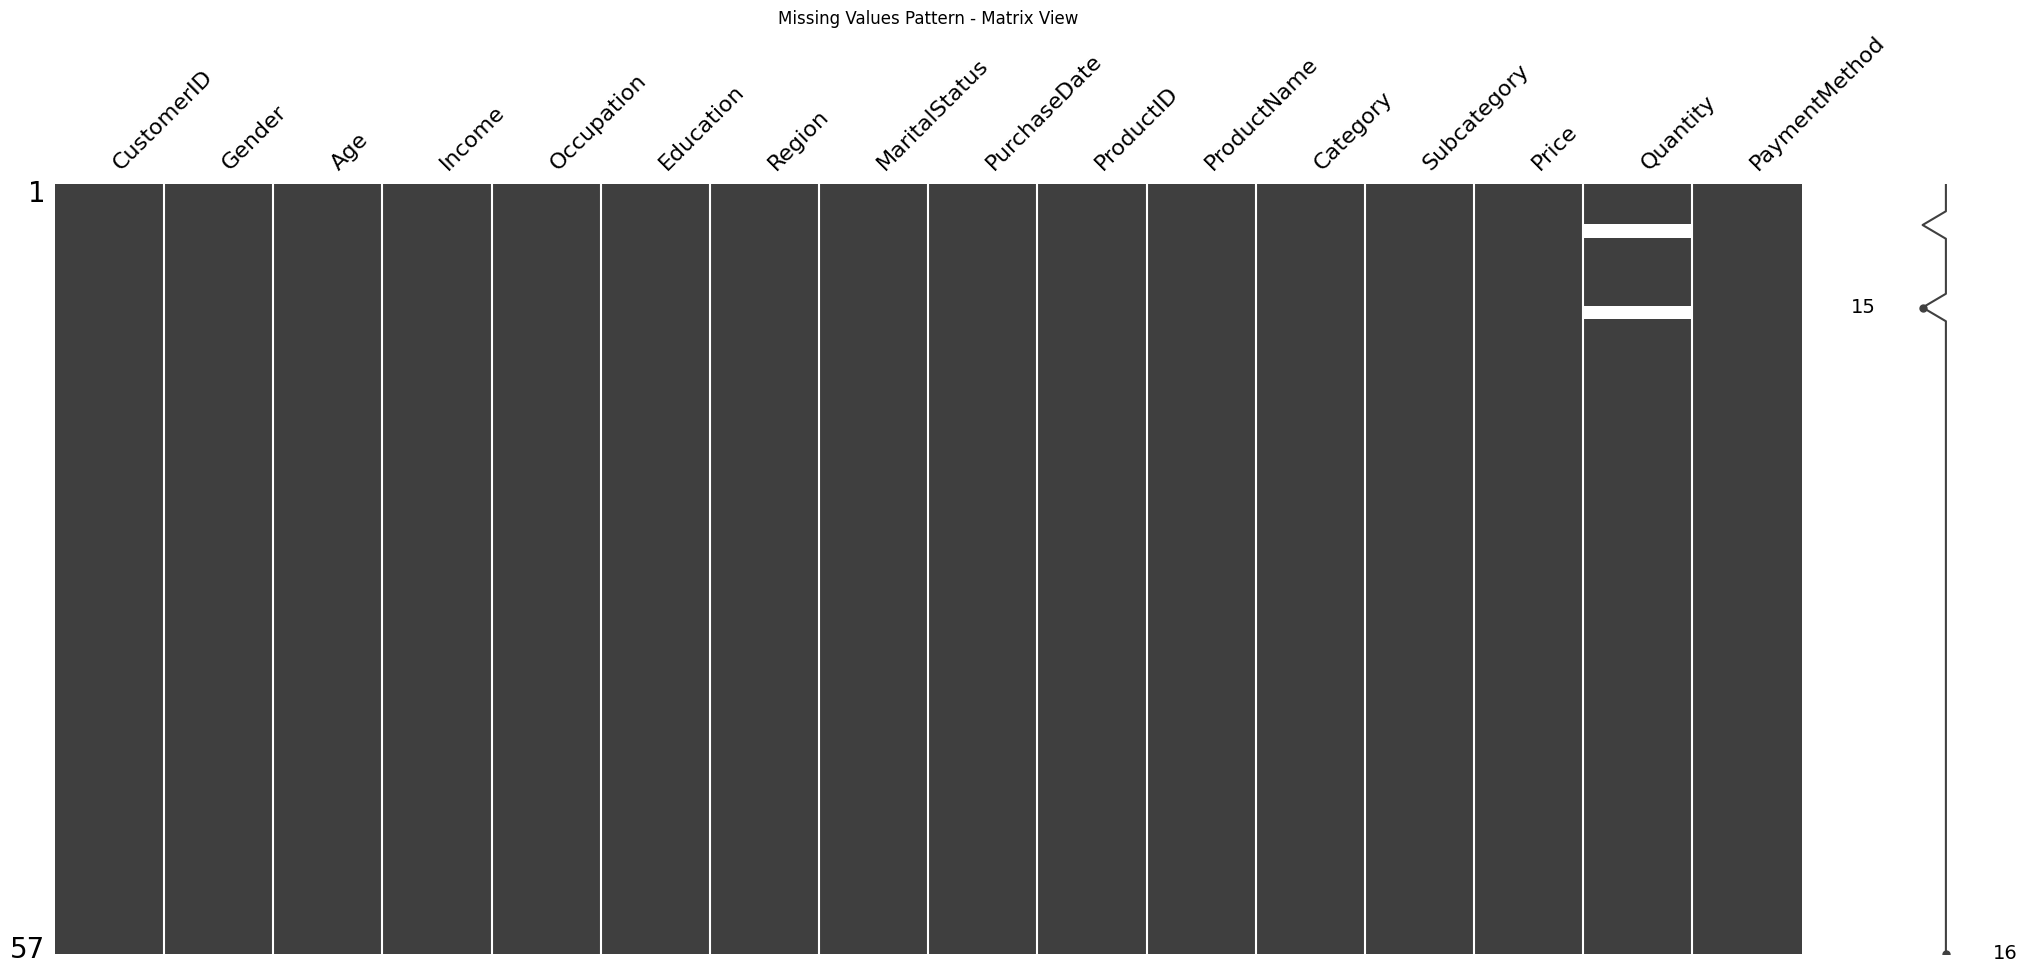

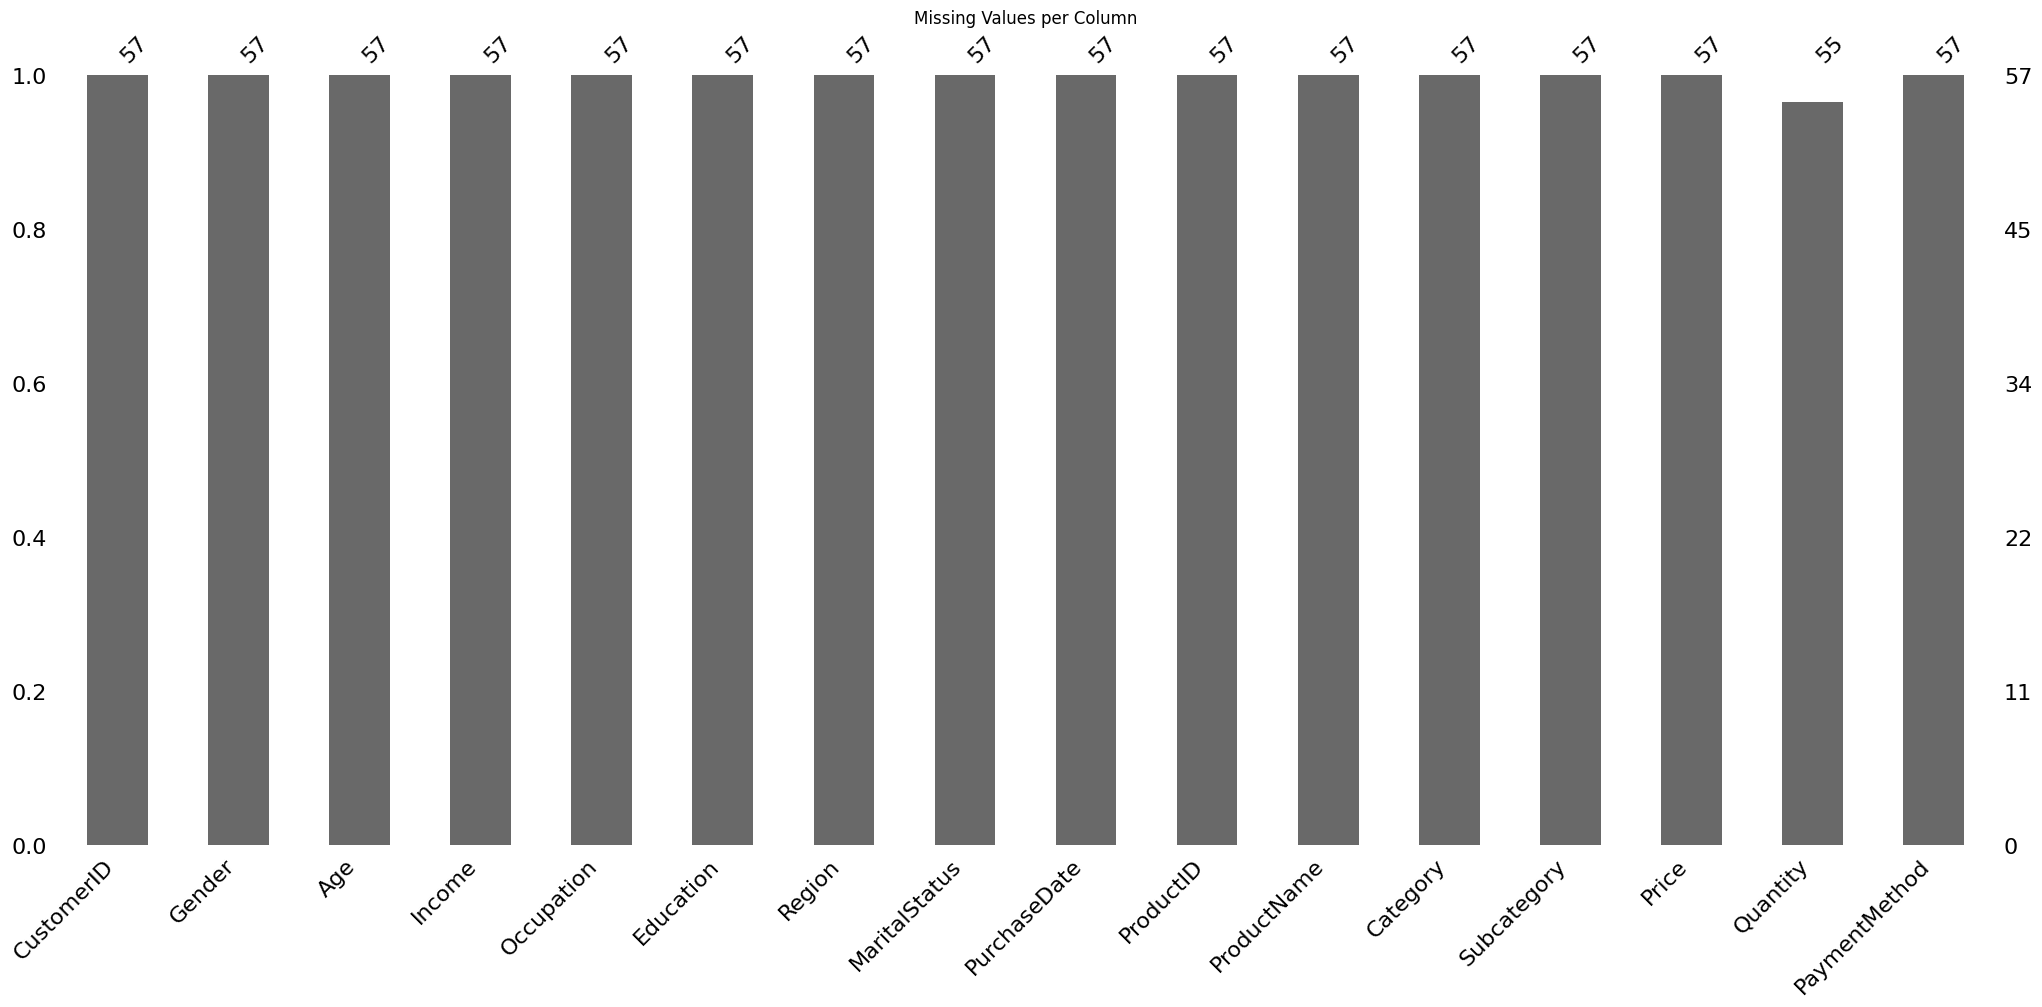

In [74]:
# 3. Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Visualize the missing data matrix
msno.matrix(df)
plt.title("Missing Values Pattern - Matrix View")
plt.show()

# Or: Visualize as a bar chart
msno.bar(df)
plt.title("Missing Values per Column")
plt.show()


### 4.2 Handling Missing Values

Now, let's apply different techniques to handle missing values:

1. Create a new DataFrame with rows that have missing values
2. Create a new DataFrame with rows that have no missing values
3. Fill missing Quantity values with the median quantity for that product category
4. Fill missing Price values with the mean price for that product category

In [75]:
# 1. Rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing.head())

   CustomerID  Gender  Age  Income Occupation Education   Region MaritalStatus PurchaseDate ProductID           ProductName Category Subcategory   Price  Quantity PaymentMethod
3        1003  Female   45   95000     Doctor       PhD  Central       Married   2024-03-07      P023          Coffee Maker     Home     Kitchen  149.99       NaN    Debit Card
9        1006    Male   39   85000    Manager  Bachelor  Central       Married   2024-03-02      P056  Professional Blender     Home     Kitchen  299.95       NaN   Credit Card


In [76]:
# 2. Rows with no missing values
rows_without_missing = df.dropna()
print(rows_without_missing.head())


   CustomerID  Gender  Age  Income Occupation Education   Region MaritalStatus PurchaseDate ProductID           ProductName     Category  Subcategory    Price  Quantity PaymentMethod
0        1001    Male   34   72000   Engineer  Bachelor     East       Married   2024-03-05      P001       Laptop HP Elite  Electronics    Computers  1200.50       1.0   Credit Card
1        1001    Male   34   72000   Engineer  Bachelor     East       Married   2024-02-15      P045   External Hard Drive  Electronics  Accessories    89.99       2.0   Credit Card
2        1002  Female   28   65000    Teacher    Master     West        Single   2024-03-10      P012              Yoga Mat       Sports      Fitness    35.50       1.0        PayPal
4        1003  Female   45   95000     Doctor       PhD  Central       Married   2024-03-15      P056  Professional Blender         Home      Kitchen   299.95       1.0   Credit Card
5        1003  Female   45   95000     Doctor       PhD  Central       Married   2024

In [80]:
# 3. Fill missing Quantity with median by category
df['Quantity'] = df.groupby('Category')['Quantity'].transform(
    lambda x: x.fillna(x.median())
)
df['Quantity'].head()

,Quantity
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [81]:
# 4. Fill missing Price with mean by category
# Fill missing Price with mean per Category
df['Price'] = df.groupby('Category')['Price'].transform(
    lambda x: x.fillna(x.mean())
)


### 4.3 Practical Application: Creating a Clean Dataset

Create a clean version of the dataset by applying the following steps:

1. Fill missing Quantity values with the median quantity for that product category
2. Fill missing Price values with the mean price for that product category
3. Create a 'TotalAmount' column that multiplies Price by Quantity
4. Convert PurchaseDate to datetime format if not already
5. Create a 'PurchaseMonth' and 'PurchaseYear' column
6. Create a 'CustomerSpend' DataFrame that shows the total amount spent by each customer

In [82]:
# Create a copy of the DataFrame to work with
clean_df = df.copy()

# 1. Fill missing Quantity values
clean_df['Quantity'] = clean_df.groupby('Category')['Quantity'].transform(
    lambda x: x.fillna(x.median())
)
clean_df['Quantity'].head()


,Quantity
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [83]:
# 2. Fill missing Price values
clean_df['Price'] = clean_df.groupby('Category')['Price'].transform(
    lambda x: x.fillna(x.mean())
)
clean_df['Price'].head()

,Price
0,1200.50
1,89.99
2,35.50
3,149.99
4,299.95


In [85]:
# 3. Create TotalAmount column
clean_df['TotalAmount'] = clean_df['Price'] * clean_df['Quantity']
clean_df['TotalAmount'].head()

,TotalAmount
0,1200.50
1,179.98
2,35.50
3,149.99
4,299.95


In [86]:
# 4. Convert PurchaseDate to datetime
if not pd.api.types.is_datetime64_dtype(clean_df['PurchaseDate']):
    clean_df['PurchaseDate'] = pd.to_datetime(clean_df['PurchaseDate'])
clean_df['PurchaseDate'].head()

,PurchaseDate
0,2024-03-05
1,2024-02-15
2,2024-03-10
3,2024-03-07
4,2024-03-15


In [88]:
# 5. Create PurchaseMonth and PurchaseYear columns
clean_df['PurchaseMonth'] = clean_df['PurchaseDate'].dt.month
clean_df['PurchaseYear'] = clean_df['PurchaseDate'].dt.year
clean_df[['PurchaseMonth', 'PurchaseYear']].head()

,PurchaseMonth,PurchaseYear
0,3,2024
1,2,2024
2,3,2024
3,3,2024
4,3,2024


In [89]:
# 6. Create CustomerSpend DataFrame
CustomerSpend = clean_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
CustomerSpend = CustomerSpend.rename(columns={'TotalAmount': 'TotalSpent'})
print(CustomerSpend.head())


   CustomerID  TotalSpent
0        1001     1380.48
1        1002       35.50
2        1003      699.93
3        1004      599.99
4        1005      219.94


## Bonus Challenge (10 extra points)

Analyze the purchasing patterns of customers based on demographic factors:

1. For each age group, determine the most popular product category (by number of purchases)
2. For each income level ('High', 'Medium', 'Low'), calculate the average spend per purchase
3. Compare spending patterns between male and female customers across different product categories
4. Identify which regions have the highest average purchase amounts

In [90]:
# 1. Most popular product category by age group
# merge clean_df with customer_profiles to analyze based on demographic factor
# Merge clean purchase data with customer profile info
merged_df = clean_df.merge(customer_profiles, on='CustomerID', how='left')
# Count purchases per AgeGroup and Category
popular_by_age = merged_df.groupby(['AgeGroup', 'Category']).size().reset_index(name='PurchaseCount')

# Find the most popular category per AgeGroup
most_popular_category = popular_by_age.loc[popular_by_age.groupby('AgeGroup')['PurchaseCount'].idxmax()]
print(most_popular_category)


       AgeGroup     Category  PurchaseCount
3         Young  Electronics              9
17  Middle-aged  Electronics              8
29       Senior        Books              3


<ipython-input-90-9040c23ba220>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_by_age = merged_df.groupby(['AgeGroup', 'Category']).size().reset_index(name='PurchaseCount')
<ipython-input-90-9040c23ba220>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_popular_category = popular_by_age.loc[popular_by_age.groupby('AgeGroup')['PurchaseCount'].idxmax()]


In [91]:
# 2. Average spend per purchase by income level
# Calculate average TotalAmount per CustomerValue
avg_spend_income = merged_df.groupby('CustomerValue')['TotalAmount'].mean().reset_index()
avg_spend_income.columns = ['CustomerValue', 'AvgSpendPerPurchase']
print(avg_spend_income)


  CustomerValue  AvgSpendPerPurchase
0           Low           256.141000
1        Medium           370.691200
2          High           441.424545


<ipython-input-91-a67b9ce430ad>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_income = merged_df.groupby('CustomerValue')['TotalAmount'].mean().reset_index()


In [106]:
# 3. Spending patterns by gender across product categories
# Remove potential conflicting columns from clean_df before merge
clean_df = clean_df.drop(columns=['Gender', 'Age', 'Income', 'Education', 'Region', 'MaritalStatus'], errors='ignore')

# Merge clean_df with customer_profiles
merged_df = clean_df.merge(customer_profiles, on='CustomerID', how='left')
# Group by Gender and Category, then calculate average TotalAmount
gender_category_spending = merged_df.groupby(['Gender', 'Category'])['TotalAmount'].mean().reset_index()
# Rename columns for clarity
gender_category_spending.columns = ['Gender', 'Category', 'AvgSpend']
# Display result
print(gender_category_spending)








    Gender      Category    AvgSpend
0   Female         Books  244.000000
1   Female   Electronics  237.421250
2   Female     Furniture  899.990000
3   Female        Health  178.330000
4   Female          Home  249.976667
5   Female          Pets  175.000000
6   Female  Professional  975.000000
7   Female      Services  349.000000
8   Female      Software  137.495000
9   Female        Sports   78.000000
10    Male   Accessories  350.000000
11    Male         Books  495.750000
12    Male      Clothing  599.990000
13    Male   Electronics  521.988889
14    Male     Furniture  832.663333
15    Male        Health  109.975000
16    Male          Home  274.725000
17    Male        Office  125.000000
18    Male      Services  424.000000
19    Male      Software  569.497500
20    Male        Sports  399.990000
21    Male        Travel  399.000000


In [107]:
# 4. Regions with highest average purchase amounts
# Average purchase amount per region
region_avg_purchase = merged_df.groupby('Region')['TotalAmount'].mean().reset_index()
region_avg_purchase.columns = ['Region', 'AvgPurchaseAmount']
region_avg_purchase = region_avg_purchase.sort_values(by='AvgPurchaseAmount', ascending=False)
print(region_avg_purchase)


    Region  AvgPurchaseAmount
1     East         495.245000
3    South         466.770000
0  Central         378.613333
2    North         277.048889
4     West         216.216364


## Summary

In this assignment, you've practiced various techniques for indexing, selecting, and filtering data in Pandas, as well as identifying and handling missing values. These skills are essential for any data analysis project and form the foundation for more advanced data manipulation operations.

Summarize what you've learned from this assignment and how you might apply these techniques in future data analysis tasks.

*Your summary here*